<a href="https://colab.research.google.com/github/sreenathmt/ICT-DS-COURSE/blob/main/Case_Study_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study on Measurement of Central Tendency and Dispersion

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Reading Data
df=pd.read_csv('D:\Data analysis\ICTK\Case study#2\StudentsPerformance.csv')

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.001,15.569567,0.0,57.0,66.0,77.00,100.0
reading score,1000.0,69.195,14.706436,17.0,59.0,70.0,79.25,100.0
writing score,1000.0,68.119,15.226381,10.0,58.0,69.0,79.00,100.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 1. Find out how many males and females participated in the test.


In [ ]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

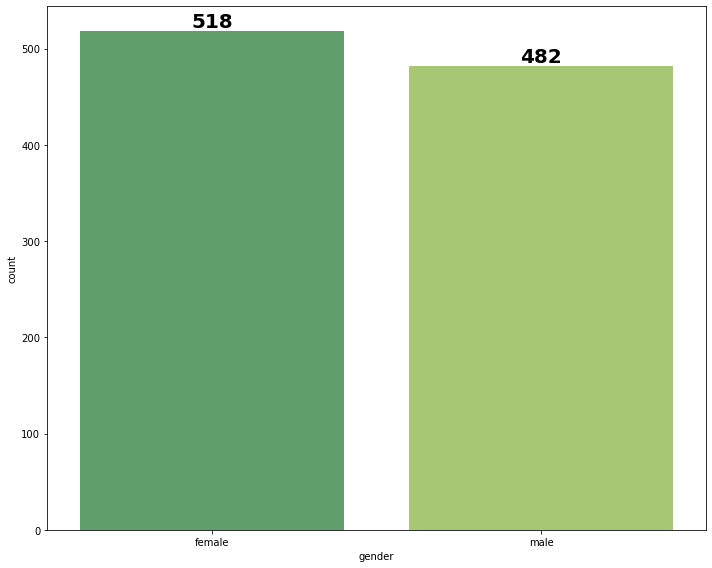

In [ ]:
plt.figure(figsize=(10, 8))
ax=sns.countplot(x=df['gender'], data=df, palette='summer')
ax.bar_label(ax.containers[0],fontsize=20,fontweight="bold")
plt.tight_layout()
plt.show()

* From the graph its clear that 518 Females and 482 Males participated in the test

## 2. What do you think about the student's parental level of education?


In [ ]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

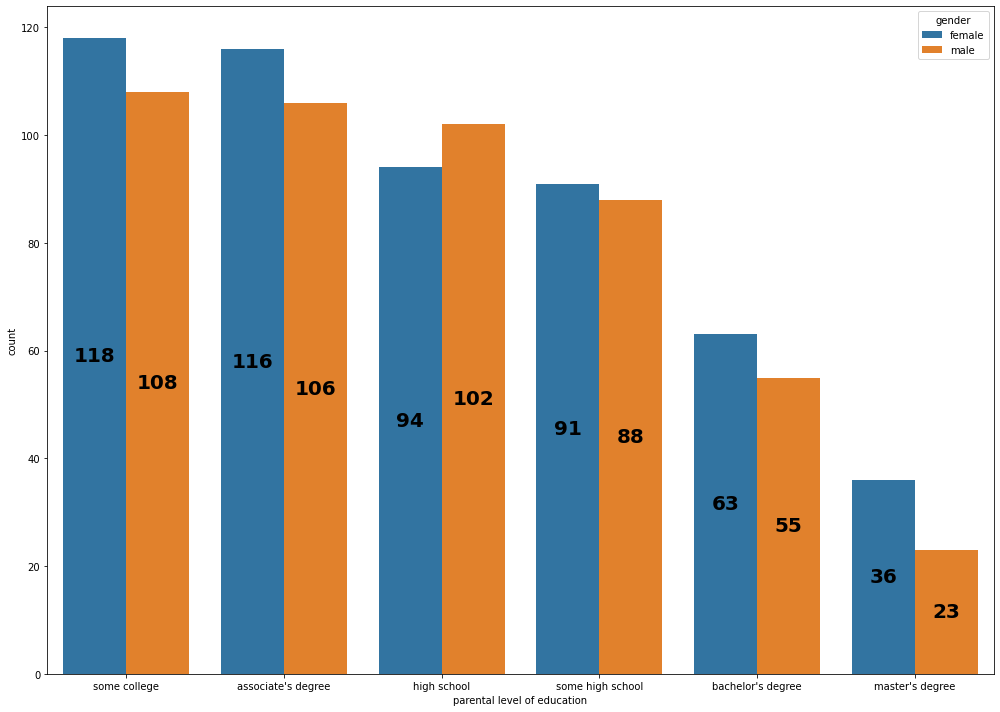

In [ ]:
plt.figure(figsize=(14, 10))
ax=sns.countplot(x=df['parental level of education'],order=df['parental level of education'].value_counts(ascending=False).index, data=df, hue='gender')
ax.bar_label(ax.containers[0],fontsize=20,fontweight="bold",label_type='center')
ax.bar_label(ax.containers[1],fontsize=20,fontweight="bold",label_type='center')
plt.tight_layout()
plt.show()

*  From the above graph we can clearly see that most of the parents are graduated from some college, very few are masters degree holder among the masters degree holder parents of female's are leading.

## 3. Who scores the most on average for math, reading and writing based on
### ● Gender
### ● Test preparation course


In [ ]:
avg_gender=df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
avg_test=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()


In [ ]:
avg_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


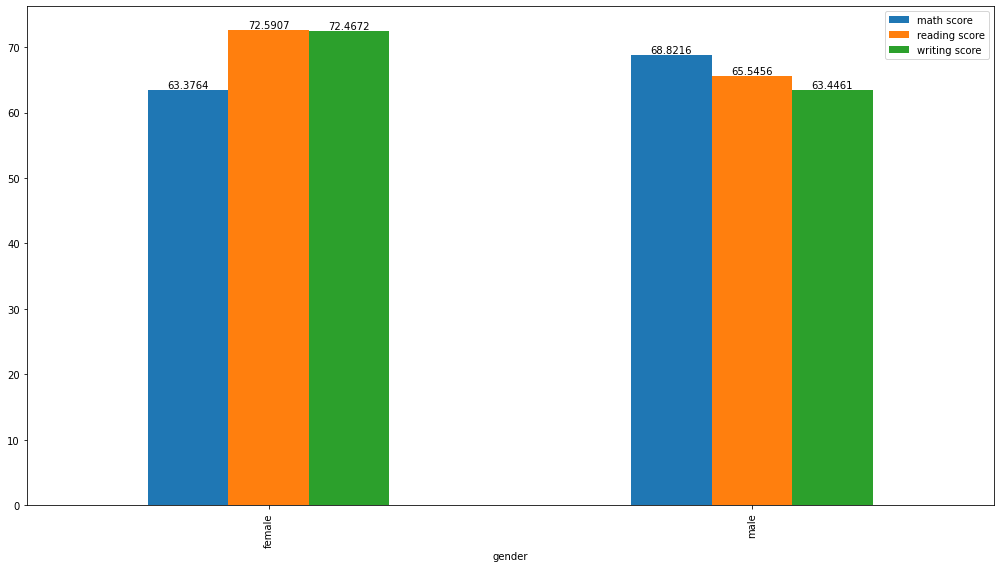

In [ ]:
ax=avg_gender.plot(kind='bar',figsize=(14,8))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.tight_layout()


* On an average Males scores higher in maths and females are on top in other subjects.

In [ ]:
avg_test

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


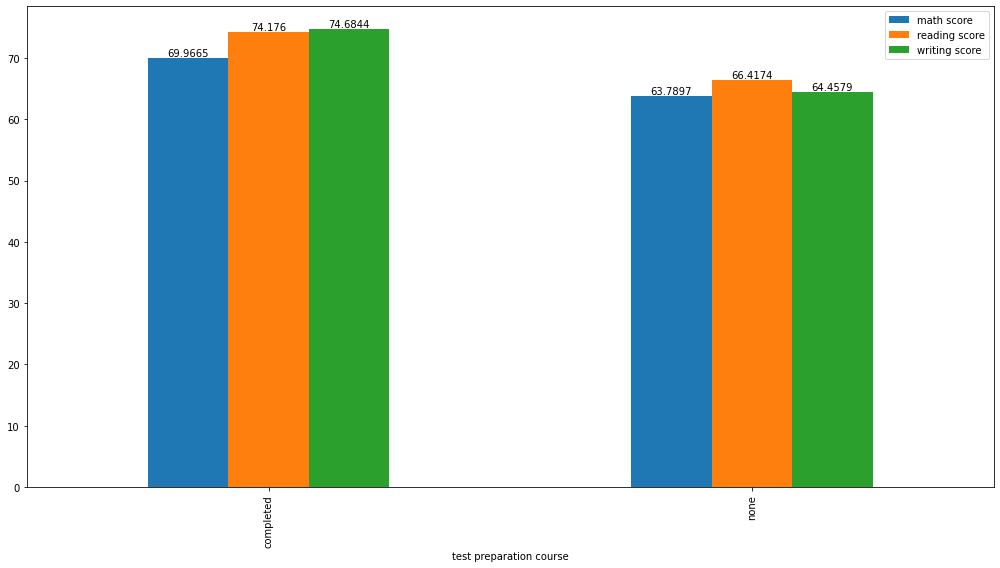

In [ ]:
ax=avg_test.plot(kind='bar',figsize=(14,8))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.tight_layout()

* While considering test preparation course , those who have completed the course are ahead in scoring.

## 4. What do you think about the scoring variation for math, reading and writing based on
### ● Gender
### ● Test preparation course


In [ ]:
var_gender=df.groupby('gender')[['math score', 'reading score', 'writing score']].var()
var_test=df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].var()

In [ ]:
var_gender

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


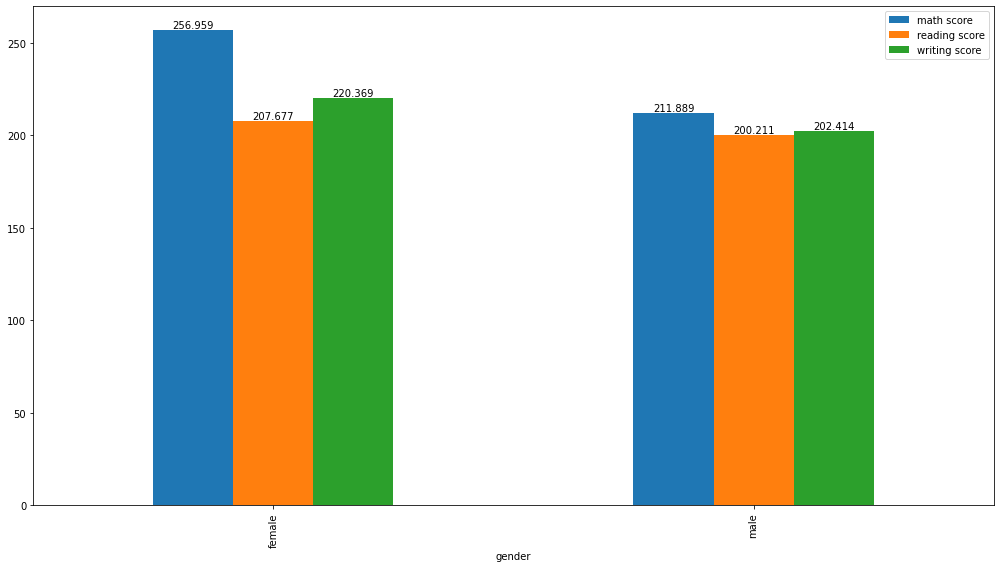

In [ ]:
ax=var_gender.plot(kind='bar',figsize=(14,8))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.tight_layout()

* Clearly females are on the lead while considering variance fro all the subjects

In [ ]:
var_test

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


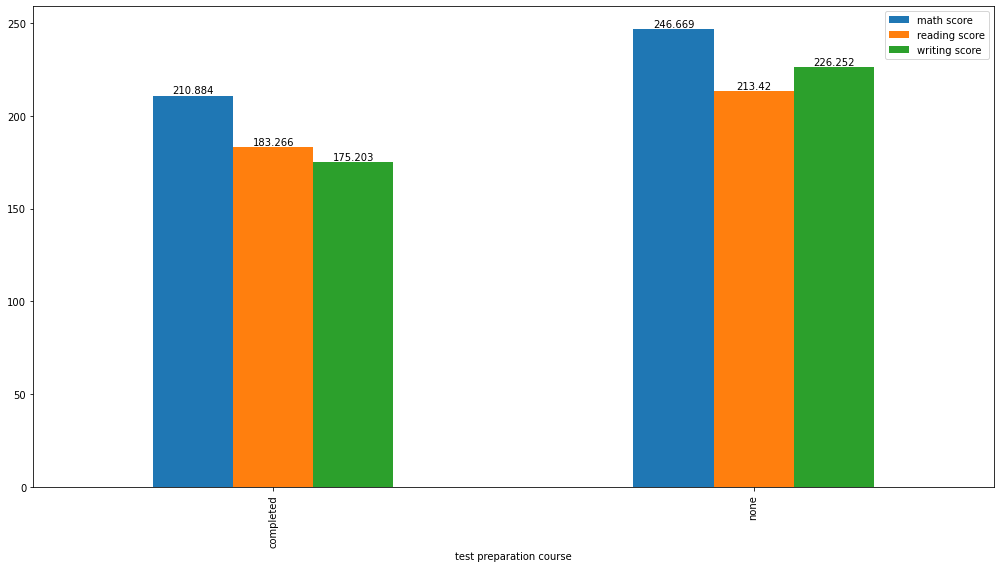

In [ ]:
ax=var_test.plot(kind='bar',figsize=(14,8))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.tight_layout()

* Those who havent completed the courses are on higher varience side.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [ ]:
# this will show the 75% quartile

df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.001,15.569567,0.0,57.0,66.0,77.00,100.0
reading score,1000.0,69.195,14.706436,17.0,59.0,70.0,79.25,100.0
writing score,1000.0,68.119,15.226381,10.0,58.0,69.0,79.00,100.0


In [ ]:
df['math score'].quantile(0.75)

77.0

In [ ]:
# from above we can see that 77 marks is the 75% quartile and we can get the need top 25% by taking marks equal to and above 77
Top_math = df[df['math score'] >= 77] 

In [ ]:
Top_math.shape

(255, 8)

In [ ]:
Top_math.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89


* From the above about 255 students are eligible for the bonus points and their data is available in Top_math Variable.